In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range

In [261]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv",encoding='ISO-8859-1')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [262]:
print("size of the data: ",df.shape)
print("name of the columns: ",df.columns)

size of the data:  (9551, 21)
name of the columns:  Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [263]:
df2 = pd.read_excel(r"C:\Users\USER\Downloads\Country-Code.xlsx")
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [264]:
df_new = pd.merge(df,df2)
df_new.shape

(9551, 22)

In [265]:
df_new.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

 Restaurant Id: Unique id of every restaurant across various cities of the world
 
 Restaurant Name: Name of the restaurant
 
 Country Code: Country in which restaurant is located
 
 City: City in which restaurant is located
 
 Address: Address of the restaurant
 
 Locality: Location in the city

 Locality Verbose: Detailed description of the locality

 Longitude: Longitude coordinate of the restaurant&#39;s location

 Latitude: Latitude coordinate of the restaurant&#39;s location

 Cuisines: Cuisines offered by the restaurant

 Average Cost for two: Cost for two people in different currencies
 
 Currency: Currency of the country

 Has Table booking: yes/no

 Has Online delivery: yes/ no

 Is delivering: yes/ no

 Switch to order menu: yes/no

 Price range: range of price of food

 Aggregate Rating: Average rating out of 5

 Rating color: depending upon the average rating color

 Rating text: text on the basis of rating of rating
 Votes: Number of ratings casted by people


In [266]:
# List of countries the survey is spread across
df_new["Country"].value_counts()

India             8652
United States      434
United Kingdom      80
South Africa        60
UAE                 60
Brazil              60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [267]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

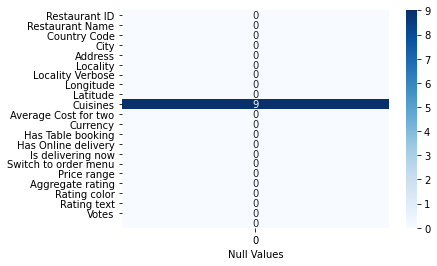

In [268]:
# null vallue measures
sns.heatmap(df_new.isnull().sum().values.reshape(-1,1), \
            annot=True, cmap=plt.cm.Blues, yticklabels=df.columns)
plt.xlabel('Null Values')
plt.show()

In [269]:
# Group by the 'country' column and get the most frequent cuisine for each country
country_mode = df_new.groupby('Country')['Cuisines'].agg(lambda x: x.value_counts().index[0])

In [270]:
for index, row in df_new.iterrows():
    country = row['Country']
    cuisine = row['Cuisines']
    
     # If cuisine is NaN, replace it with the most frequent cuisine for the corresponding country
    if pd.isna(cuisine):
        df_new.at[index, 'Cuisines'] = country_mode[country]

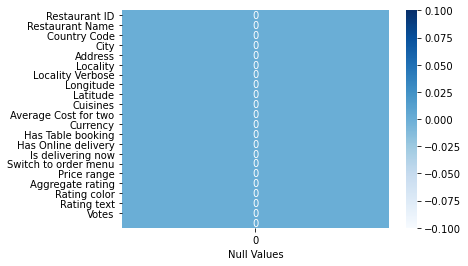

In [271]:
sns.heatmap(df_new.isnull().sum().values.reshape(-1,1), \
            annot=True, cmap=plt.cm.Blues, yticklabels=df.columns)
plt.xlabel('Null Values')
plt.show()

In [272]:
for i in df_new.columns:
    print(df_new[i].value_counts())
    print('\n')

2047        1
18398605    1
3467        1
7561        1
18294392    1
           ..
8913        1
4815        1
3200002     1
18254540    1
18432000    1
Name: Restaurant ID, Length: 9551, dtype: int64


Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Hunter's Kitchen       1
Suribachi              1
Bj's Lounge & Cafe     1
Miles Inn              1
Little Delhi           1
Name: Restaurant Name, Length: 7446, dtype: int64


1      8652
216     434
215      80
214      60
30       60
189      60
148      40
208      34
14       24
162      22
94       21
191      20
166      20
184      20
37        4
Name: Country Code, dtype: int64


New Delhi        5473
Gurgaon          1118
Noida            1080
Faridabad         251
Ghaziabad          25
                 ... 
Tagaytay City       1
Dicky Beach         1
Cochrane            1
Randburg            1
Ojo Caliente        1
Name: City, 

As per above details we can understand that 'Switch to order menu' has sigle value, so it not give much use so drop the column

In [273]:
df_new.drop("Switch to order menu",axis=1,inplace=True)

In [274]:
df_new.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


here mean and median have huge difference so skewness present in the data and also look at the difference of 75th and maximum outliers also there in the data 

([<matplotlib.patches.Wedge at 0x220f137e880>,
 [Text(0.07305422300938562, -1.0975714466495996, 'No'),
  Text(-0.0730543257714403, 1.097571439809765, 'Yes')],
 [Text(0.03984775800511942, -0.5986753345361452, '74.3%'),
  Text(-0.03984781405714925, 0.5986753308053263, '25.7%')])

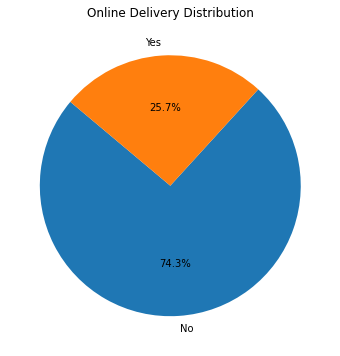

In [275]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df_new['Has Online delivery'].value_counts()/9551*100, labels=df_new['Has Online delivery'].value_counts().index, autopct='%1.1f%%',
    startangle=140)

Here, only 25.7% restaurants are accept online delivery distribution

In [276]:
# lets see the country and its currency
country_currency = df_new.groupby('Country')['Currency'].unique()

# Print the extracted country and currency pairs
for country, currencies in country_currency.items():
    print(f"{country} - {', '.join(currencies)}")

Australia - Dollar($)
Brazil - Brazilian Real(R$)
Canada - Dollar($)
India - Indian Rupees(Rs.)
Indonesia - Indonesian Rupiah(IDR)
New Zealand - NewZealand($)
Phillipines - Botswana Pula(P)
Qatar - Qatari Rial(QR)
Singapore - Dollar($)
South Africa - Rand(R)
Sri Lanka - Sri Lankan Rupee(LKR)
Turkey - Turkish Lira(TL)
UAE - Emirati Diram(AED)
United Kingdom - Pounds(£)
United States - Dollar($)


In [277]:
# lets analys deep in rating of restaurants
rating = df_new.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns={0:"count"})
rating

,Aggregate rating,Rating color,Rating text,count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


conclusion:
    
    0.0 - white - not rated 
    (1.8 - 2.4) - red - Poor
    (2.5 - 3.4) - orange - Average
    (3.5 - 3.9) - Yellow - Good
    (4.0 - 4.4) - Green - Very Good
    (4.5 - 4.9) - Dark Green - Excellent

<AxesSubplot:xlabel='Rating color', ylabel='count'>

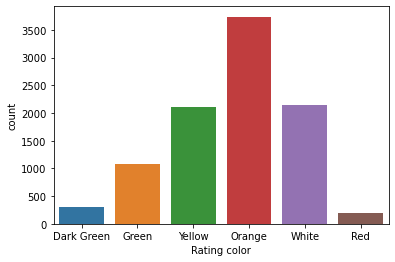

In [278]:
sns.countplot("Rating color",data=df_new)

Mostof the restaurant got Average rate

In [279]:
df2[df2['Country'] == 'India']['Country Code']

0    1
Name: Country Code, dtype: int64

throgh this code we can get country code of any country

In [280]:
restaurants = df_new[df_new["Country Code"] == 1]
restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,"Sagar Nagar, Vizag",83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",...,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,193,India
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Siripuram, Vizag",0.000000,0.000000,"Cafe, North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,2,3.7,Yellow,Good,85,India
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,"Siripuram, Vizag",83.315281,17.719539,"Burger, Pizza, Biryani",...,Indian Rupees(Rs.),No,No,No,2,4.3,Green,Very Good,172,India
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","The Park, Lawsons Bay, Vizag",83.336840,17.721182,"American, North Indian, Thai, Continental",...,Indian Rupees(Rs.),No,No,No,4,3.8,Yellow,Good,74,India


In [281]:
restaurants.shape

(8652, 21)

Since a significant portion of the restaurants are located in India compared to the total dataset size, it's advisable to analyze the data using city names to avoid bias.

In [282]:
df_new.drop("Address",axis=1,inplace= True)

we have all the details of restaurand and Address column is not much neccessary for the prediction

In [283]:
df_new.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

<AxesSubplot:xlabel='Price range', ylabel='Count'>

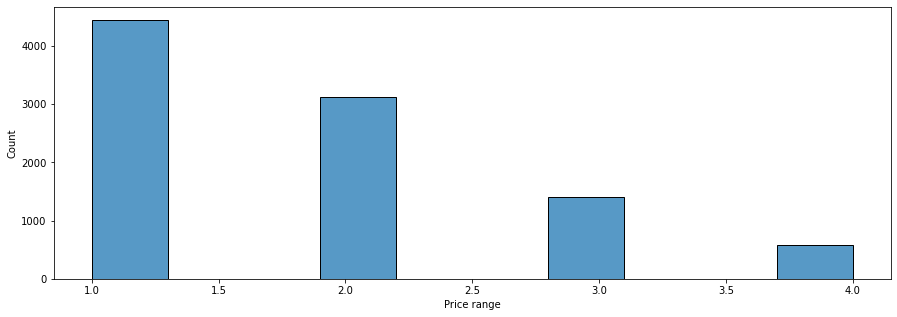

In [284]:
plt.figure(figsize=(15,5))
sns.histplot(x='Price range',data=df_new,bins=10)

highest price range in between 1.0 to 1.3

<AxesSubplot:xlabel='Latitude', ylabel='Count'>

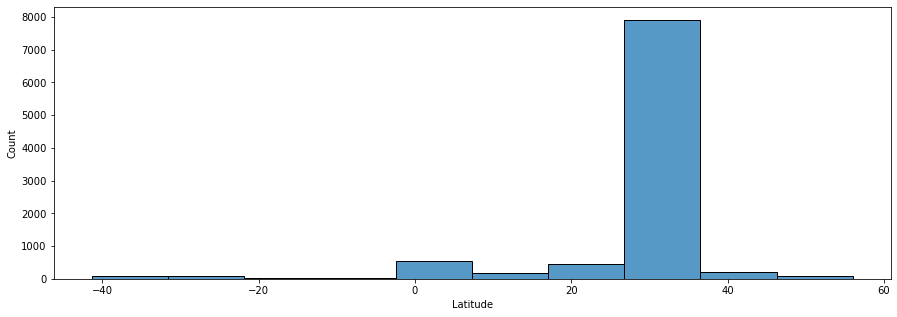

In [285]:
plt.figure(figsize=(15,5))
sns.histplot(x='Latitude',data=df_new,bins=10)

<AxesSubplot:xlabel='Country', ylabel='Count'>

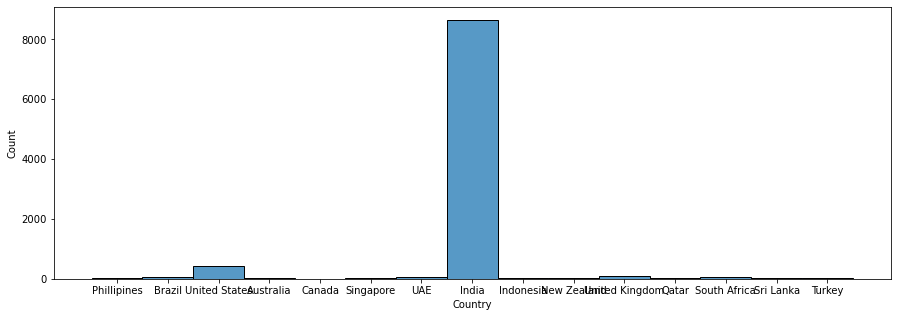

In [286]:
plt.figure(figsize=(15,5))
sns.histplot(x='Country',data=df_new,bins=10)

MOst of the given data from India

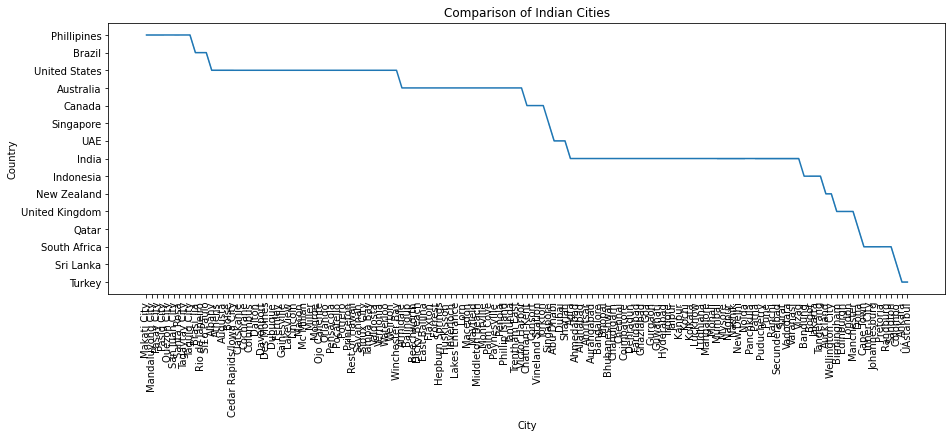

In [287]:
plt.figure(figsize=(15,5))
sns.lineplot(x='City', y = 'Country',data  = df_new)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Indian Cities')
plt.xlabel('City')
plt.ylabel('Country')
plt.show()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64
[3 4 2 1]


<AxesSubplot:xlabel='Country', ylabel='count'>

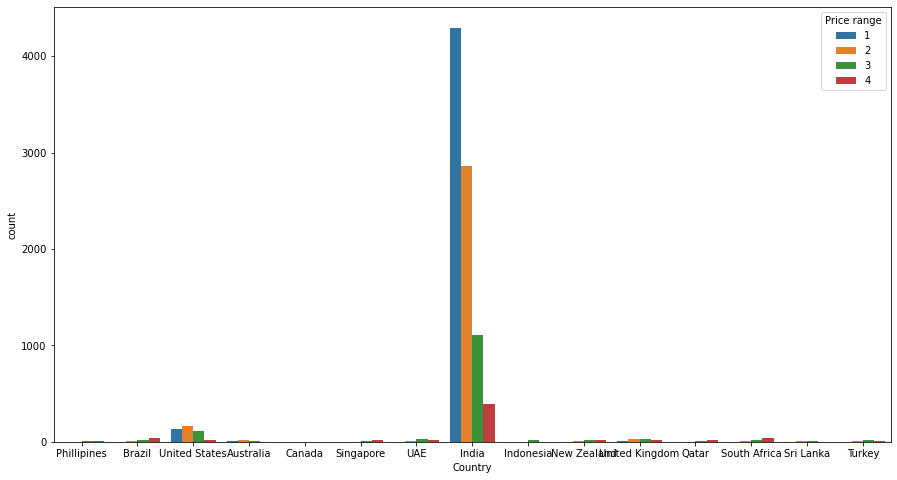

In [288]:
print(df_new["Price range"].value_counts())
print(df_new["Price range"].unique())
plt.figure(figsize=(15,8))
sns.countplot("Country",data=df_new, hue='Price range')

highest price also from India

<AxesSubplot:xlabel='Country', ylabel='Average Cost for two'>

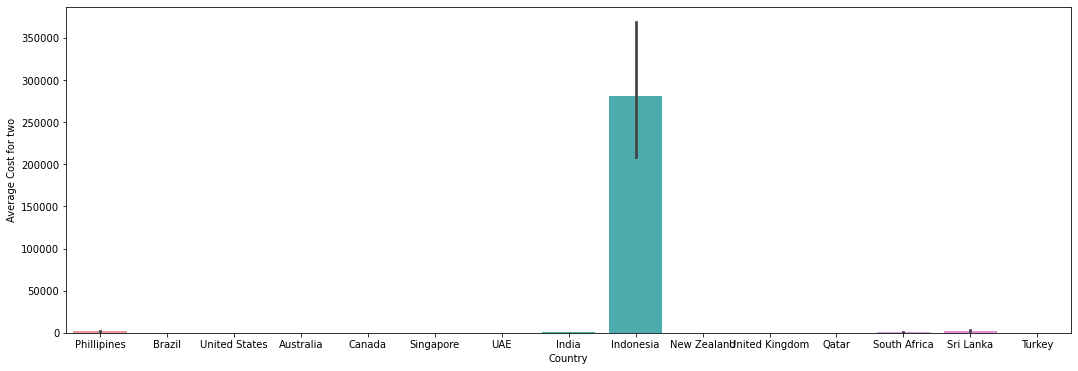

In [289]:
plt.figure(figsize=(18,6))
sns.barplot(x="Country",data=df_new, y='Average Cost for two')

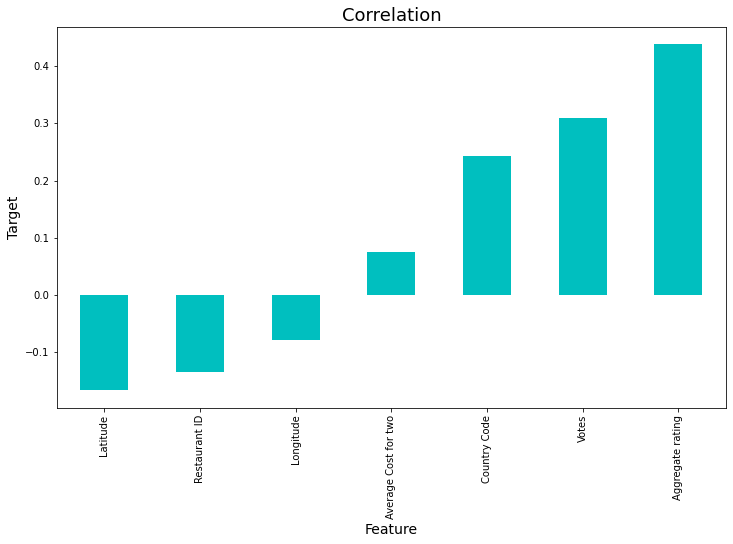

In [290]:
plt.figure(figsize=(12,7))
df_new.corr()['Price range'].sort_values(ascending=True).drop(['Price range']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Average cost for two, country code, votes and aggregate rating are positivly correlated and others are negativly correlated with target

In [291]:
df.corr()["Price range"].sort_values().to_frame("Correlation in Ascending order")

,Correlation in Ascending order
Latitude,-0.166688
Restaurant ID,-0.134540
Longitude,-0.078939
Average Cost for two,0.075083
Country Code,0.243327
Votes,0.309444
Aggregate rating,0.437944
Price range,1.000000


In [292]:
from sklearn.preprocessing import LabelEncoder

In [293]:
code = LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=="object":
        df_new[i]=code.fit_transform(df_new[i].values.reshape(-1,1))

In [294]:
df.corr()["Price range"].sort_values().to_frame("Correlation in Ascending order")

,Correlation in Ascending order
Latitude,-0.166688
Restaurant ID,-0.134540
Longitude,-0.078939
Average Cost for two,0.075083
Country Code,0.243327
Votes,0.309444
Aggregate rating,0.437944
Price range,1.000000


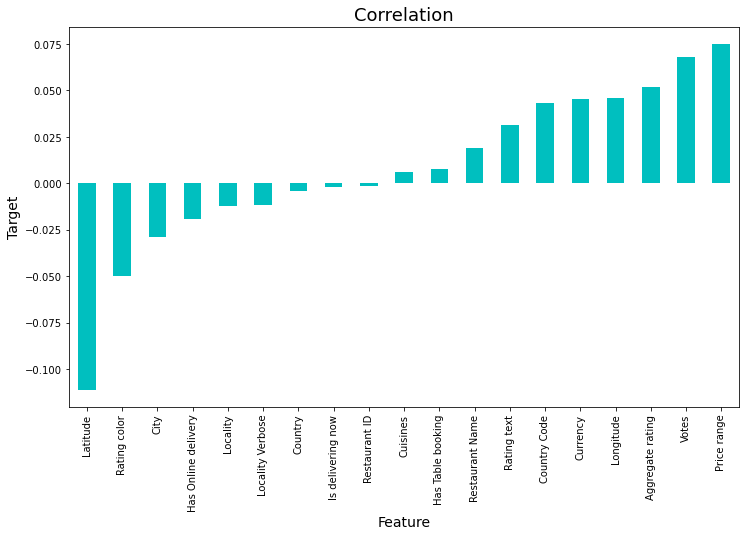

In [295]:
plt.figure(figsize=(12,7))
df_new.corr()['Average Cost for two'].sort_values(ascending=True).drop(['Average Cost for two']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Half of the features are positivly correlated with target value

<AxesSubplot:>

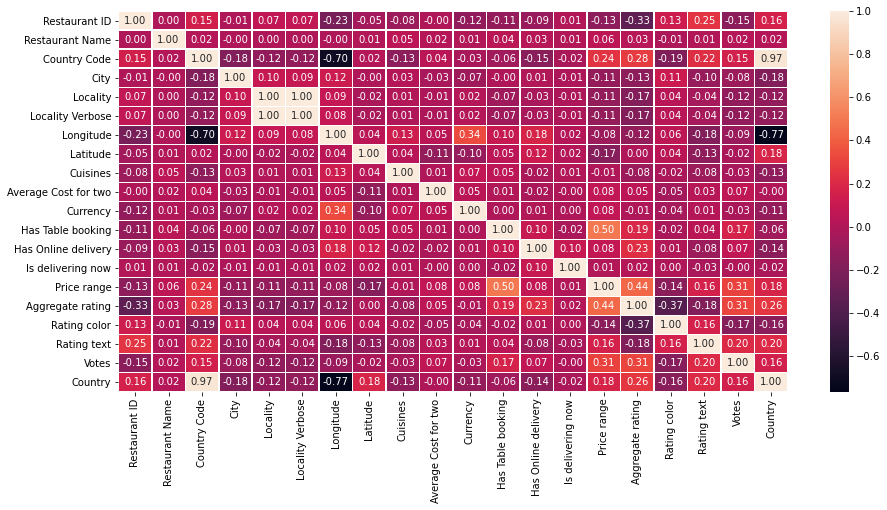

In [296]:
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

country and country code are highly correlated with each other 

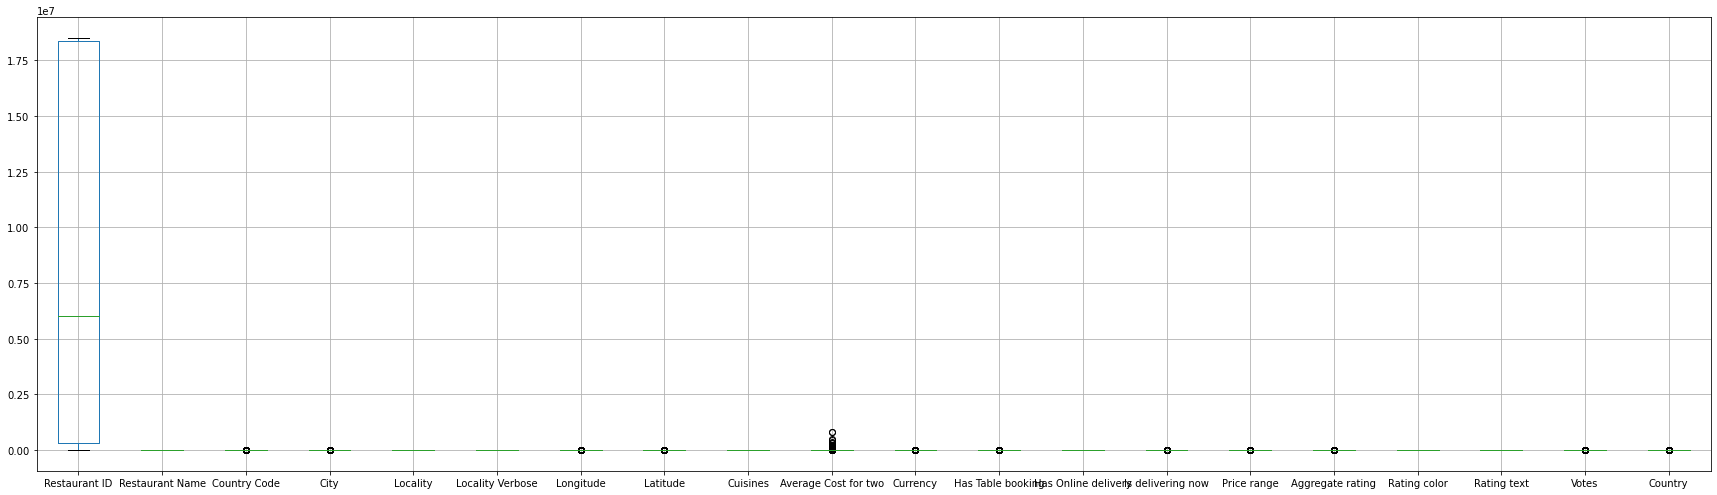

In [297]:
df_new.boxplot(figsize=(30,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

outliers also can see in some of the columns

Target : Average Cost for two

outlier remove

In [298]:
df_new.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

contineus columns: 'Restaurant ID','Country Code','Longitude','Latitude','Votes','Aggregate rating'

In [299]:
from scipy.stats import zscore

In [300]:
variable = df_new[[ 'Restaurant ID','Country Code','Longitude','Latitude','Votes','Aggregate rating']]
z = np.abs(zscore(variable))
z.shape

(9551, 6)

In [301]:
threshold = 3
print (np.where(z>3))

(array([  22,   23,   24, ..., 9548, 9549, 9550], dtype=int64), array([3, 3, 3, ..., 1, 1, 1], dtype=int64))


In [302]:
print('Shape before removing outliers:', df_new.shape)

df_new1 = df_new[(z < threshold).all(axis=1)]

print('Shape after removing outliers:', df_new1.shape)

Shape before removing outliers: (9551, 20)
Shape after removing outliers: (8581, 20)


In [303]:
data_loss=((9551-8581)/9551)*100
data_loss

10.15600460684745

Target : price range

outlier remove

columns : 'Restaurant ID','Country Code','Longitude','Latitude','Votes','Aggregate rating','Average Cost for two'

In [304]:
variable1 = df_new[['Restaurant ID','Country Code','Longitude','Latitude','Votes','Aggregate rating','Average Cost for two']]
z1 = np.abs(zscore(variable1))
z1.shape

(9551, 7)

In [305]:
threshold = 3
print (np.where(z1>3))

(array([  22,   23,   24, ..., 9548, 9549, 9550], dtype=int64), array([3, 3, 3, ..., 1, 1, 1], dtype=int64))


In [306]:
print('Shape before removing outliers:', df_new.shape)

df_new2 = df_new[(z1 < threshold).all(axis=1)]

print('Shape after removing outliers:', df_new2.shape)

Shape before removing outliers: (9551, 20)
Shape after removing outliers: (8565, 20)


In [307]:
data_loss=((9551-8565)/9551)*100
data_loss

10.323526332321222

target : Average Cost for two

handling skewness

In [308]:
df_new1.skew()

Restaurant ID            0.116431
Restaurant Name          0.042842
Country Code            10.805559
City                    -1.566975
Locality                -0.312714
Locality Verbose        -0.238650
Longitude               -3.496889
Latitude                -3.149880
Cuisines                -0.350954
Average Cost for two    36.956533
Currency                -1.105565
Has Table booking        2.278900
Has Online delivery      1.003260
Is delivering now       15.794732
Price range              1.022024
Aggregate rating        -0.878228
Rating color             0.091040
Rating text              0.432118
Votes                    3.627893
Country                 12.061655
dtype: float64

handling skewness in continus column: Country Code,Longitude, Latitude, Votes                    

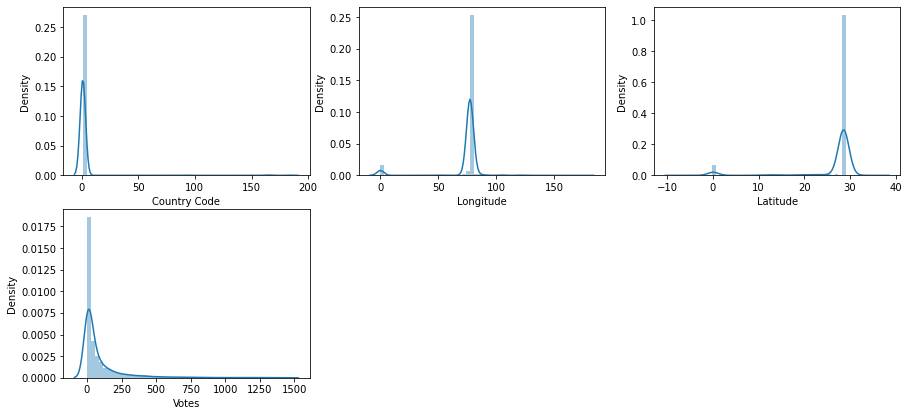

In [309]:
cat_list = ['Country Code','Longitude', 'Latitude', 'Votes']
plt.figure(figsize=(15,18))
plotnumber = 1

for column in df_new1[cat_list]:
    if plotnumber<=10:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df_new1[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [310]:
for i in cat_list:
    if df_new1.skew().loc[i]>0.55:
        df_new1[i] = np.log1p(df_new1[i])
df_new1.skew()

Restaurant ID            0.116431
Restaurant Name          0.042842
Country Code            10.325948
City                    -1.566975
Locality                -0.312714
Locality Verbose        -0.238650
Longitude               -3.496889
Latitude                -3.149880
Cuisines                -0.350954
Average Cost for two    36.956533
Currency                -1.105565
Has Table booking        2.278900
Has Online delivery      1.003260
Is delivering now       15.794732
Price range              1.022024
Aggregate rating        -0.878228
Rating color             0.091040
Rating text              0.432118
Votes                   -0.053064
Country                 12.061655
dtype: float64

skewness removed from votes coluymn

In [311]:
cat_list_new = ('Country Code','Longitude', 'Latitude')
for i in cat_list_new:
    if df_new1.skew().loc[i]>0.55:
        df_new1[i] = np.sqrt(df_new1[i])
df_new1.skew()

Restaurant ID            0.116431
Restaurant Name          0.042842
Country Code            10.302469
City                    -1.566975
Locality                -0.312714
Locality Verbose        -0.238650
Longitude               -3.496889
Latitude                -3.149880
Cuisines                -0.350954
Average Cost for two    36.956533
Currency                -1.105565
Has Table booking        2.278900
Has Online delivery      1.003260
Is delivering now       15.794732
Price range              1.022024
Aggregate rating        -0.878228
Rating color             0.091040
Rating text              0.432118
Votes                   -0.053064
Country                 12.061655
dtype: float64

In [312]:
from sklearn.preprocessing  import power_transform, StandardScaler
cat_list_new = ('Country Code','Longitude', 'Latitude')
for i in cat_list_new:
    if df_new1.skew().loc[i]>0.55:
        df_new1[i] = power_transform(df_new1[[i]], method='yeo-johnson')
df_new1.skew()

Restaurant ID            0.116431
Restaurant Name          0.042842
Country Code             0.000000
City                    -1.566975
Locality                -0.312714
Locality Verbose        -0.238650
Longitude               -3.496889
Latitude                -3.149880
Cuisines                -0.350954
Average Cost for two    36.956533
Currency                -1.105565
Has Table booking        2.278900
Has Online delivery      1.003260
Is delivering now       15.794732
Price range              1.022024
Aggregate rating        -0.878228
Rating color             0.091040
Rating text              0.432118
Votes                   -0.053064
Country                 12.061655
dtype: float64

Target : Price range

handling skewness

In [313]:
df_new2.skew()

Restaurant ID            0.117936
Restaurant Name          0.043339
Country Code            11.593933
City                    -1.574332
Locality                -0.313046
Locality Verbose        -0.238927
Longitude               -3.529965
Latitude                -3.180873
Cuisines                -0.351834
Average Cost for two     3.718671
Currency                -1.193208
Has Table booking        2.275670
Has Online delivery      1.000376
Is delivering now       15.779828
Price range              1.029231
Aggregate rating        -0.877262
Rating color             0.092075
Rating text              0.431465
Votes                    3.653843
Country                 12.293693
dtype: float64

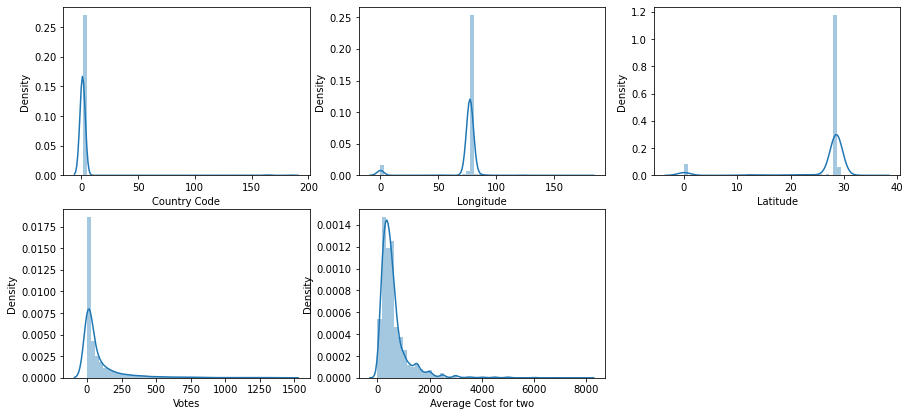

In [314]:
cat_list = ['Country Code','Longitude', 'Latitude', 'Votes','Average Cost for two']
plt.figure(figsize=(15,18))
plotnumber = 1

for column in df_new2[cat_list]:
    if plotnumber<=10:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df_new2[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [315]:
for i in cat_list:
    if df_new2.skew().loc[i]>0.55:
        df_new2[i] = np.log1p(df_new2[i])
df_new2.skew()

Restaurant ID            0.117936
Restaurant Name          0.043339
Country Code            11.535751
City                    -1.574332
Locality                -0.313046
Locality Verbose        -0.238927
Longitude               -3.529965
Latitude                -3.180873
Cuisines                -0.351834
Average Cost for two    -0.351499
Currency                -1.193208
Has Table booking        2.275670
Has Online delivery      1.000376
Is delivering now       15.779828
Price range              1.029231
Aggregate rating        -0.877262
Rating color             0.092075
Rating text              0.431465
Votes                   -0.052647
Country                 12.293693
dtype: float64

almost normally distributed in Votes,Average Cost for two

In [316]:
cat_list_new = ('Country Code','Longitude', 'Latitude')
for i in cat_list_new:
    if df_new2.skew().loc[i]>0.55:
        df_new2[i] = np.sqrt(df_new2[i])
df_new2.skew()

Restaurant ID            0.117936
Restaurant Name          0.043339
Country Code            11.534195
City                    -1.574332
Locality                -0.313046
Locality Verbose        -0.238927
Longitude               -3.529965
Latitude                -3.180873
Cuisines                -0.351834
Average Cost for two    -0.351499
Currency                -1.193208
Has Table booking        2.275670
Has Online delivery      1.000376
Is delivering now       15.779828
Price range              1.029231
Aggregate rating        -0.877262
Rating color             0.092075
Rating text              0.431465
Votes                   -0.052647
Country                 12.293693
dtype: float64

In [317]:
for i in cat_list_new:
    if df_new2.skew().loc[i]>0.55:
        df_new2[i] = power_transform(df_new2[[i]], method='yeo-johnson')
df_new2.skew()

Restaurant ID            0.117936
Restaurant Name          0.043339
Country Code            11.532839
City                    -1.574332
Locality                -0.313046
Locality Verbose        -0.238927
Longitude               -3.529965
Latitude                -3.180873
Cuisines                -0.351834
Average Cost for two    -0.351499
Currency                -1.193208
Has Table booking        2.275670
Has Online delivery      1.000376
Is delivering now       15.779828
Price range              1.029231
Aggregate rating        -0.877262
Rating color             0.092075
Rating text              0.431465
Votes                   -0.052647
Country                 12.293693
dtype: float64

highly skewed in Country Code so lets drop the column

In [318]:
df_new2.drop("Country Code",axis = 1,inplace = True)

target : Price range

In [319]:
x=df_new1.drop("Price range",axis=1)
y=df_new1["Price range"]

In [320]:
df_new1["Price range"].value_counts()

1    4289
2    2828
3    1067
4     397
Name: Price range, dtype: int64

need to balance the data 

In [321]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [322]:
y.value_counts()

4    4289
3    4289
2    4289
1    4289
Name: Price range, dtype: int64

In [323]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

target : Average Cost for two

In [324]:
x1=df_new2.drop("Average Cost for two",axis=1)
y1=df_new2["Average Cost for two"]

In [325]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

feature selection

target : Price range

In [326]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

In [327]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [328]:
var_threshold.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [329]:
x.columns[var_threshold.get_support()]

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [330]:
# taking  out  all the  constent  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

1


In [331]:
cons_columns

['Country Code']

In [332]:
x = x.drop(["Country Code"],axis=1)

target : Average Cost for two

In [333]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x1)

VarianceThreshold(threshold=0)

In [334]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [335]:
x1.columns[var_threshold.get_support()]

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [336]:
cons_columns1 = [column for column in x1.columns
               if column not in x1.columns[var_threshold.get_support()]]
print(len(cons_columns1))

0


target : Price range

In [337]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [338]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.479887,Restaurant ID
1,1.010910,Restaurant Name
2,1.142968,City
3,1001.882780,Locality
4,1000.873430,Locality Verbose
5,4.675265,Longitude
6,5.149858,Latitude
7,1.027001,Cuisines
8,1.443092,Average Cost for two
9,2.059740,Currency


In [339]:
x.drop("Locality",axis = 1,inplace = True)

In [340]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.479886,Restaurant ID
1,1.010768,Restaurant Name
2,1.138113,City
3,1.029225,Locality Verbose
4,4.674611,Longitude
5,5.149661,Latitude
6,1.026275,Cuisines
7,1.443089,Average Cost for two
8,2.053581,Currency
9,1.212495,Has Table booking


target : Average Cost for two

In [341]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.539950,Restaurant ID
1,1.009616,Restaurant Name
2,1.076562,City
3,887.781300,Locality
4,887.517041,Locality Verbose
5,8.589328,Longitude
6,8.773953,Latitude
7,1.029562,Cuisines
8,1.479468,Currency
9,1.585121,Has Table booking


In [342]:
x1.drop("Locality Verbose",axis = 1,inplace = True)

In [343]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.539542,Restaurant ID
1,1.009616,Restaurant Name
2,1.069607,City
3,1.039544,Locality
4,8.581697,Longitude
5,8.766967,Latitude
6,1.028862,Cuisines
7,1.479444,Currency
8,1.584566,Has Table booking
9,1.276564,Has Online delivery


target : Price range

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [345]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9931999222848261  on Random_state  50


In [346]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [347]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.654944627938605
confusion_matrix: 
 [[1058  239    5    3]
 [ 412  707   82   58]
 [  19  227  672  357]
 [   0   12  362  934]]
classification_report: 
               precision    recall  f1-score   support

           1       0.71      0.81      0.76      1305
           2       0.60      0.56      0.58      1259
           3       0.60      0.53      0.56      1275
           4       0.69      0.71      0.70      1308

    accuracy                           0.65      5147
   macro avg       0.65      0.65      0.65      5147
weighted avg       0.65      0.65      0.65      5147



In [348]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.9957256654361765
confusion_matrix: 
 [[1300    5    0    0]
 [   0 1254    5    0]
 [   0    7 1267    1]
 [   0    0    4 1304]]
classification_report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1305
           2       0.99      1.00      0.99      1259
           3       0.99      0.99      0.99      1275
           4       1.00      1.00      1.00      1308

    accuracy                           1.00      5147
   macro avg       1.00      1.00      1.00      5147
weighted avg       1.00      1.00      1.00      5147



In [349]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.9933942102195453
confusion_matrix: 
 [[1301    4    0    0]
 [   3 1251    5    0]
 [   0    5 1264    6]
 [   0    0   11 1297]]
classification_report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1305
           2       0.99      0.99      0.99      1259
           3       0.99      0.99      0.99      1275
           4       1.00      0.99      0.99      1308

    accuracy                           0.99      5147
   macro avg       0.99      0.99      0.99      5147
weighted avg       0.99      0.99      0.99      5147



In [350]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.7011851564017875
confusion_matrix: 
 [[1063  240    2    0]
 [ 297  890   69    3]
 [   2  334  712  227]
 [   0   10  354  944]]
classification_report: 
               precision    recall  f1-score   support

           1       0.78      0.81      0.80      1305
           2       0.60      0.71      0.65      1259
           3       0.63      0.56      0.59      1275
           4       0.80      0.72      0.76      1308

    accuracy                           0.70      5147
   macro avg       0.70      0.70      0.70      5147
weighted avg       0.71      0.70      0.70      5147



In [351]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.6231103492834766


In [352]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.9635180470942639


In [353]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.9498226780506


In [354]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for Support Vector  Classifier:  0.669625820114016


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model

In [355]:
parameter={"max_depth":np.arange(1,10),
           "criterion":["gini","entropy"],
            "min_samples_split": [2, 5, 10],
            "n_estimators": [50, 100, 200]}

In [356]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [357]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [358]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 10,
 'n_estimators': 200}

In [359]:
final_model=RandomForestClassifier(max_depth=9,criterion="entropy",min_samples_split= 2 ,n_estimators = 50)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
confusion=confusion_matrix(y_test,pred)
print(acc)

0.9887312997862833


In [360]:
import pickle
pickle.dump(gcv,open('Zomato.pickle','wb'))
loaded_model = pickle.load(open('Zomato.pickle', 'rb'))
loaded_model.predict(x_test)

array([3, 1, 3, ..., 2, 4, 4], dtype=int64)

In [362]:
  #Checking predicted and original values
a =np.array(y_test)
predicted=np.array(gcv.predict(x_test))
zomato=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
zomato

,Orginal,Predicted
0,2,3
1,1,1
2,3,3
3,4,4
4,3,3
...,...,...
5142,4,4
5143,4,4
5144,2,2
5145,4,4


target : Average Cost for two

In [363]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error

In [364]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7257659771429021 on random_state: 71


In [365]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [366]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("R2 score: ", r2_score(y_test, pred_lr))
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.7302270153760014
Mean abs error:  0.267997195059155
Mean squared error:  0.16028480772321627
Root Mean Squared Error:  0.4003558513662767


In [367]:
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)


print("R2 score: ", r2_score(y_test, pred_RFR))
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8203173877095824
Mean abs error:  0.21418629951974968
Mean squared error:  0.10675788386415314
Root Mean Squared Error:  0.32673824977212745


In [368]:
knn=KNN(n_neighbors=9 )
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print("R2 score: ", r2_score(y_test, pred_knn))
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.6769370556962444
Mean abs error:  0.2938825698084244
Mean squared error:  0.1919468770469953
Root Mean Squared Error:  0.4381174238112373


In [369]:
DTR= DecisionTreeRegressor(random_state=29)
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)


print("R2 score: ", r2_score(y_test, pred_DTR))
print("Mean abs error: ", mean_absolute_error(y_test, pred_DTR))
print("Mean squared error: ", mean_squared_error(y_test,pred_DTR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 score:  0.7203106477669023
Mean abs error:  0.26643643420146906
Mean squared error:  0.16617658772391755
Root Mean Squared Error:  0.40764762690823747


In [370]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x1,y1,cv=7).mean())

The CV score  for Linear_regression is : 0.691287012870402


In [371]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x1,y1,cv=7).mean())

The CV  score for  the Random forest regressor is: 0.7621899612534914


In [372]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x1,y1,cv=7).mean())

The CV score  for  the KNN regressor is : 0.6520386466349619


In [373]:
print('The CV score  for  the DTR is :',cross_val_score(DTR,x1,y1,cv=7).mean())

The CV score  for  the DTR is : 0.5174789340720565


From the observation of R2 Score and cross validation score and their difference we can predict that  KNeighborsRegressor(KNN) is the best model.

In [374]:
parameter = { 'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 50],
    'p': [1, 2]}

In [375]:
GridCV = GridSearchCV(KNN(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [376]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 50],
                         'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [377]:
GridCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

In [378]:
Best_model_Regressor = KNN(algorithm='auto',leaf_size=20,n_neighbors=10,p=1,weights='distance')
Best_model_Regressor.fit(x_train,y_train)
pred = Best_model_Regressor.predict(x_test)
acc = r2_score(y_test,pred_RFR)
print(acc*100)

82.03173877095824


In [379]:
filename='Zomato_regressor.pickle'
pickle.dump(Best_model_Regressor,open(filename,'wb'))
loaded_model_r = pickle.load(open(filename, 'rb'))
loaded_model_r.predict(x_test)

array([6.88415519, 7.34080621, 6.08566747, ..., 6.46771966, 5.71042445,
       6.1346698 ])

In [380]:
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Zomato_re = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Zomato_re

,Original,Predicted
0,6.908755,6.884155
1,7.170888,7.340806
2,6.111467,6.085667
3,6.685861,6.768098
4,6.216606,6.332247
...,...,...
2565,5.860786,5.501486
2566,6.908755,6.518304
2567,6.216606,6.467720
2568,4.615121,5.710424
